In [1]:
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
genes = pd.read_pickle('./old-results/INTEGRATE_unweight_ProSE100d/genes.pkl')
phasep = pd.read_pickle('./data/Label/human.condensate-formation.proteins-v1.pkl')
ppi = pd.read_csv('./old-results/networks/INTEGRATE_v2.csv')
ppi.columns = [0, 1]
ppi[2] = np.sort(ppi[[0, 1]].values).sum(axis=1)

In [ ]:
for n in tqdm(range(10)):
    embed = torch.load(f'./saves/INTEGRATE_unweight_ProSE80d_mcc/embeddings/model_{n}.pt')
    cosim = pd.DataFrame(cosine_similarity(embed))
    cosim.columns, cosim.index = genes, genes
    temp_dict = dict(zip(np.arange(len(cosim.columns)), cosim.columns))
    
    cosim_ndarray = cosim.to_numpy()
    cosim_idx = np.tril_indices(cosim_ndarray.shape[0], -1)
    idx0, idx1 = cosim_idx[0], cosim_idx[1]
    cosim_tril_ndarray = cosim_ndarray[cosim_idx]
    
    if n==0:
        cosim_tril_df = pd.DataFrame({
            'idx0': idx0,
            'idx1': idx1,
            f'cos.sim.{n}': cosim_tril_ndarray
        })
        cosim_tril_df[0] = cosim_tril_df['idx0'].map(temp_dict)
        cosim_tril_df[1] = cosim_tril_df['idx1'].map(temp_dict)
        cosim_tril_df[2] = np.sort(cosim_tril_df[[0, 1]].values).sum(axis=1)
    else:
        cosim_tril_df[f'cos.sim.{n}'] = cosim_tril_ndarray
    
    cosim_tril_df[f'pct.rank.{n}'] = cosim_tril_df[f'cos.sim.{n}'].rank(pct=True)

In [14]:
cosim_tril_df

,idx0,idx1,cos.sim.0,0,1,2,pct.rank.0,cos.sim.1,pct.rank.1,cos.sim.2,...,cos.sim.5,pct.rank.5,cos.sim.6,pct.rank.6,cos.sim.7,pct.rank.7,cos.sim.8,pct.rank.8,cos.sim.9,pct.rank.9
0,1,0,0.219037,A0A087WUL8,A0A024RBG1,A0A024RBG1A0A087WUL8,0.382691,0.020899,0.167470,-0.057042,...,-0.022966,0.103268,-0.069950,0.161323,-0.036873,0.140659,0.234527,0.475914,0.248980,0.379351
1,2,0,0.096307,A0A087X1G2,A0A024RBG1,A0A024RBG1A0A087X1G2,0.229900,0.253234,0.455833,-0.195669,...,0.177664,0.305951,0.081849,0.317997,0.238117,0.513315,0.314108,0.592427,0.167393,0.270045
2,2,1,0.583985,A0A087X1G2,A0A087WUL8,A0A087WUL8A0A087X1G2,0.881292,0.218263,0.403471,0.571413,...,0.293267,0.472939,0.263170,0.554673,-0.193603,0.043315,0.404179,0.716917,0.022578,0.125005
3,3,0,-0.008040,A0A096LP49,A0A024RBG1,A0A024RBG1A0A096LP49,0.133459,0.177754,0.345952,-0.137137,...,0.213045,0.354120,0.248431,0.534804,0.255151,0.541575,0.437933,0.759540,0.026499,0.128047
4,3,1,0.229329,A0A096LP49,A0A087WUL8,A0A087WUL8A0A096LP49,0.397103,0.535207,0.859317,0.346382,...,0.645049,0.932558,0.080085,0.315888,0.291551,0.601575,0.664601,0.955307,0.494985,0.757634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127017886,15938,15933,0.417695,Q9Y6Z7,Q9Y6X9,Q9Y6X9Q9Y6Z7,0.675885,-0.043852,0.116326,0.037629,...,0.362164,0.580550,-0.309697,0.029782,0.102604,0.301486,-0.056569,0.124309,0.305472,0.464068
127017887,15938,15934,0.421927,Q9Y6Z7,Q9Y6Y0,Q9Y6Y0Q9Y6Z7,0.681993,0.072123,0.217237,0.124904,...,0.522899,0.813581,0.305729,0.611600,0.407063,0.775174,0.555692,0.883005,0.506499,0.773638
127017888,15938,15935,0.363913,Q9Y6Z7,Q9Y6Y1,Q9Y6Y1Q9Y6Z7,0.596357,0.224495,0.412649,-0.019529,...,0.128729,0.244887,0.155774,0.410868,0.141931,0.358909,0.280364,0.543289,0.267763,0.406851
127017889,15938,15936,0.282461,Q9Y6Z7,Q9Y6Y8,Q9Y6Y8Q9Y6Z7,0.474053,0.236246,0.430130,0.104576,...,0.374339,0.599601,-0.103509,0.134267,0.406428,0.774330,0.516725,0.846973,0.575887,0.859887


In [78]:
dataset1 = cosim_tril_df[[0, 1, 2] + [f'cos.sim.{n}' for n in range(10)]].copy()
dataset1['mean.cos.sim'] = dataset1[[f'cos.sim.{n}' for n in range(10)]].mean(axis=1)

In [79]:
dataset2 = dataset1[[0, 1, 2, 'mean.cos.sim']].copy()
dataset2['pct.rank'] = dataset2['mean.cos.sim'].rank(pct=True)

In [81]:
dataset2.head()

,0,1,2,mean.cos.sim,pct.rank
0,A0A087WUL8,A0A024RBG1,A0A024RBG1A0A087WUL8,0.087869,0.182683
1,A0A087X1G2,A0A024RBG1,A0A024RBG1A0A087X1G2,0.187769,0.344599
2,A0A087X1G2,A0A087WUL8,A0A087WUL8A0A087X1G2,0.260465,0.483875
3,A0A096LP49,A0A024RBG1,A0A024RBG1A0A096LP49,0.203987,0.374811
4,A0A096LP49,A0A087WUL8,A0A087WUL8A0A096LP49,0.404254,0.750635


In [83]:
# dataset2.to_pickle('./saves/INTEGRATE_unweight_ProSE80d_mcc/pairwise_cosine/model_average.pkl')

## CoPhase interactions with cosine similarity score

In [3]:
dataset2 = pd.read_pickle('./saves/INTEGRATE_unweight_ProSE80d_mcc/pairwise_cosine/model_average.pkl')

In [4]:
cophase_raw = pd.read_excel('./data/file-2_Co-Phase Separation Lists - 0326.xlsx', sheet_name=4)
cophase_df = cophase_raw[cophase_raw['Database'].str.contains('PhaSepDB2.0')][['UniProt Entry 1', 'UniProt Entry 2']].reset_index(drop=True)
cophase_df.columns = [0, 1]
cophase_df[0] = cophase_df[0].apply(lambda x: x.split('-')[0])
cophase_df[1] = cophase_df[1].apply(lambda x: x.split('-')[0])
cophase_df[2] = np.sort(cophase_df[[0, 1]].values).sum(axis=1)

In [5]:
# Add Nck-Nephrin interaction
cophase_df = cophase_df.append(pd.DataFrame({
    0: ['P16333'],
    1: ['O60500'],
    2: ['O60500P16333']
})).reset_index(drop=True)

In [6]:
len(set(cophase_df[2].tolist()))

141

In [7]:
cophase_pct_rank = dataset2[dataset2[2].isin(set(cophase_df[2]))].reset_index(drop=True)
pct_rank_vals = dataset2[dataset2[2].isin(set(cophase_df[2]))]['pct.rank']

In [8]:
cophase_pct_rank

,0,1,2,mean.cos.sim,pct.rank
0,P04049,P01116,P01116P04049,0.543413,0.924266
1,P06748,O75683,O75683P06748,0.854549,0.999688
2,P15056,P01116,P01116P15056,0.500733,0.883903
3,P15056,P04049,P04049P15056,0.713350,0.992607
4,P16333,O00401,O00401P16333,0.889662,0.999909
...,...,...,...,...,...
115,Q9Y2X7,Q13136,Q13136Q9Y2X7,0.403037,0.748628
116,Q9Y5A9,Q7Z739,Q7Z739Q9Y5A9,0.861589,0.999750
117,Q9Y6N9,Q13402,Q13402Q9Y6N9,0.201215,0.369595
118,Q9Y6N9,Q495M9,Q495M9Q9Y6N9,0.481836,0.862275


In [53]:
1 - cophase_pct_rank['pct.rank'].median()

0.005225702810637944

In [ ]:
# cophase_pct_rank[cophase_pct_rank[2].str.contains('O00401')]

# cophase_pct_rank[cophase_pct_rank[2].str.contains('P62993')]

# cophase_pct_rank.sort_values(by='pct.rank', ascending=False)[0: 25]

In [9]:
import matplotlib.pyplot as plt  
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [10]:
dat_plot = cophase_pct_rank[[2, 'pct.rank', 'mean.cos.sim']].copy()
dat_plot['x'] = 1 - dat_plot['pct.rank']
dat_plot = dat_plot.rename(columns={'mean.cos.sim': 'y'})

In [11]:
# Sos1-Grb2-LAT
dat1 = dat_plot[dat_plot[2].isin(['P62993Q07889', 'O43561P62993'])].reset_index(drop=True)
# SPOP-Daxx
dat2 = dat_plot[dat_plot[2].isin(['O43791Q9UER7'])].reset_index(drop=True)
# WASL-Nck1-Nephrin
dat3 = dat_plot[dat_plot[2].isin(['O60500P16333', 'O00401P16333'])].reset_index(drop=True)
# CBX5-SUV91-Histone
dat4 = dat_plot[dat_plot[2].isin(['O43463P45973', 'O43463P68431'])].reset_index(drop=True)

In [50]:
dat4

,2,pct.rank,y,x
0,O43463P45973,0.997107,0.763979,0.002893
1,O43463P68431,0.992567,0.713031,0.007433


Text(0.02, 0.7, 'SUV39H1-H3C1')

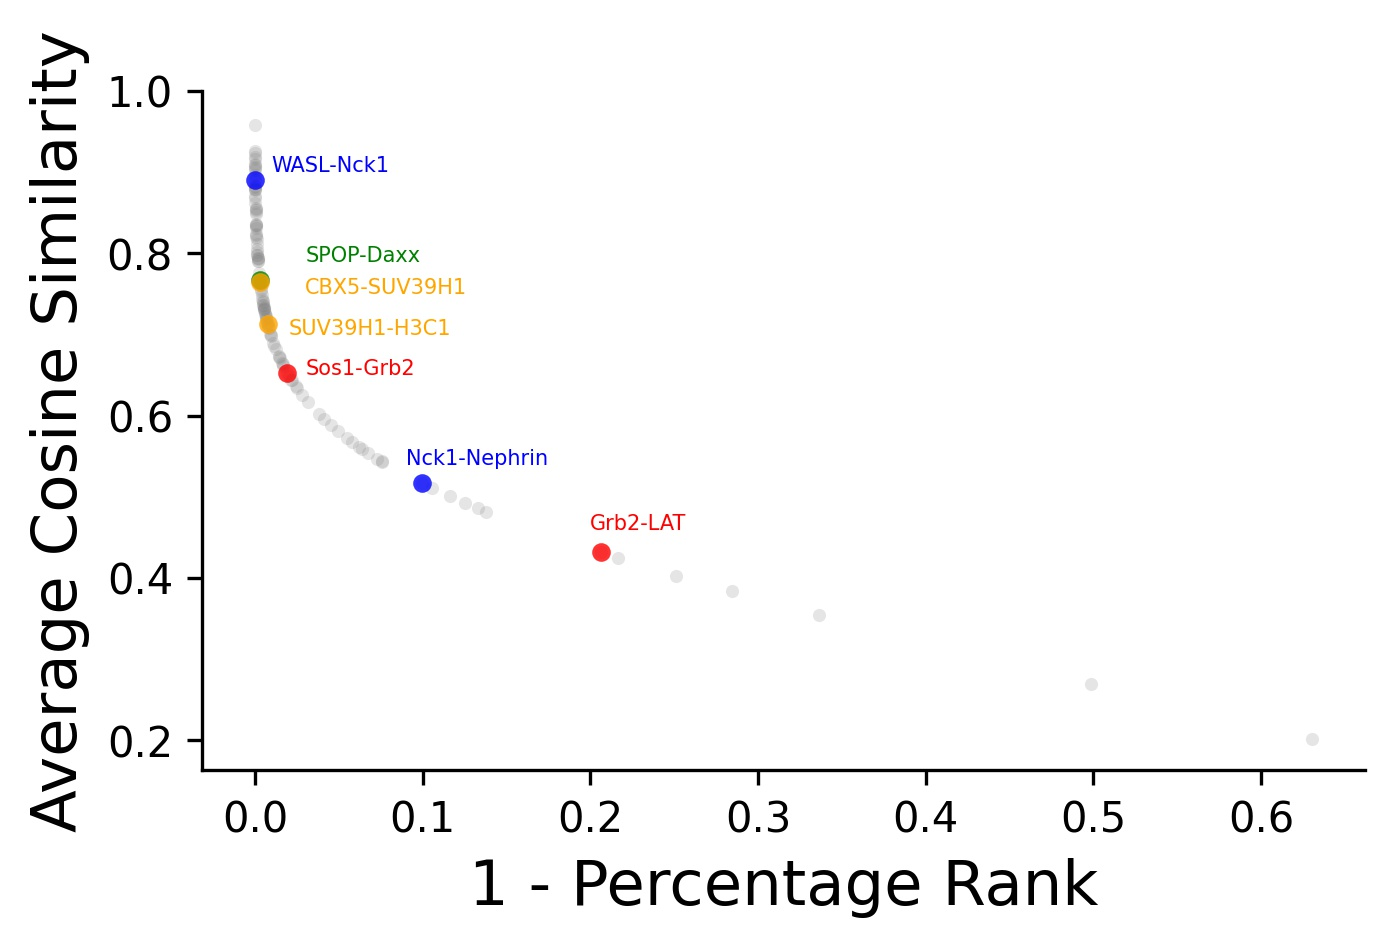

In [12]:
fig, ax = plt.subplots(
    figsize = (5, 3)
)
sns.scatterplot(
    x = 'x',
    y = 'y',
    data = dat_plot,
    color = 'grey',
    s = 10,
    linewidth = 0,
    alpha = .2,
    legend = False,
    ax = ax
)

# Sos1-Grb2-LAT
sns.scatterplot(x='x', y='y', data=dat1, color='red', s=20, linewidth=0, alpha=.8, legend=False, ax=ax)
# SPOP-Daxx
sns.scatterplot(x='x', y='y', data=dat2, color='green', s=20, linewidth=0, alpha=.8, legend=False, ax=ax)
# WASL-Nck1-Nephrin
sns.scatterplot(x='x', y='y', data=dat3, color='blue', s=20, linewidth=0, alpha=.8, legend=False, ax=ax)
# SUV91-CBX5-Histone
sns.scatterplot(x='x', y='y', data=dat4, color='orange', s=20, linewidth=0, alpha=.8, legend=False, ax=ax)

ax.set_xlabel('1 - Percentage Rank', size = 15)
ax.set_ylabel('Average Cosine Similarity', size = 15)
ax.set_yticks(np.arange(.2, 1.2, .2))
ax.set_yticklabels([round(i, 2) for i in np.arange(.2, 1.2, .2)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.plot(
#     [.0, .1], 
#     [.88, .9], 
#     'k-', lw=2
# )
ax.text(.01, .9,'WASL-Nck1', c='blue', fontsize=5)
ax.text(.09, .54,'Nck1-Nephrin', c='blue', fontsize=5)
ax.text(.03, .65,'Sos1-Grb2', c='red', fontsize=5)
ax.text(.2, .46,'Grb2-LAT', c='red', fontsize=5)
ax.text(.03, .79,'SPOP-Daxx', c='green', fontsize=5)
ax.text(.03, .75,'CBX5-SUV39H1', c='orange', fontsize=5)
ax.text(.02, .7,'SUV39H1-H3C1', c='orange', fontsize=5)

In [13]:
dataset3 = dataset2.copy()
dataset3.loc[dataset3[2].isin(ppi[2].tolist()), 'label'] = 1
dataset3['label'] = dataset3['label'].fillna(0).astype(int)

In [14]:
dataset3.groupby('label')['mean.cos.sim'].mean()

label
0    0.266351
1    0.539886
Name: mean.cos.sim, dtype: float32

In [15]:
dataset4 = dataset3[dataset3['label']==1].reset_index(drop=True)

In [16]:
dataset4['pct.rank.within_PPIN'] = dataset4['mean.cos.sim'].rank(pct=True)

In [64]:
dataset4[dataset4[2].isin(set(cophase_df[2]))].median()

/home/lyz/anaconda3/envs/EPGAT/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mean.cos.sim            0.763035
pct.rank                0.997051
label                   1.000000
pct.rank.within_PPIN    0.890808
dtype: float64

In [17]:
# Grb2 P62993
dataset_grb2 = dataset4[dataset4[2].str.contains('P62993')][[0, 1, 2, 'mean.cos.sim']].reset_index(drop=True)
dataset_grb2['pct.rank.Grb2'] = dataset_grb2['mean.cos.sim'].rank(pct=True)
dataset_grb2.loc[dataset_grb2[2].isin(cophase_df[2]), 'label'] = 1
dataset_grb2['label'] = dataset_grb2['label'].fillna(0).astype(int)
dataset_grb2['x'] = 1 - dataset_grb2['pct.rank.Grb2']
dataset_grb2 = dataset_grb2.rename(columns={'mean.cos.sim': 'y'})
dataset_grb2 = dataset_grb2.sort_values(by='y', ascending=False).reset_index(drop=True)
dataset_grb2['rank.Grb2'] = np.arange(len(dataset_grb2)) + 1

# Nck1 P16333
dataset_nck1 = dataset4[dataset4[2].str.contains('P16333')][[0, 1, 2, 'mean.cos.sim']].reset_index(drop=True)
dataset_nck1['pct.rank.Nck1'] = dataset_nck1['mean.cos.sim'].rank(pct=True)
dataset_nck1.loc[dataset_nck1[2].isin(cophase_df[2]), 'label'] = 1
dataset_nck1['label'] = dataset_nck1['label'].fillna(0).astype(int)
dataset_nck1['x'] = 1 - dataset_nck1['pct.rank.Nck1']
dataset_nck1 = dataset_nck1.rename(columns={'mean.cos.sim': 'y'})
dataset_nck1 = dataset_nck1.sort_values(by='y', ascending=False).reset_index(drop=True)
dataset_nck1['rank.Nck1'] = np.arange(len(dataset_nck1)) + 1

# HP1a P45973
dataset_hp1a = dataset4[dataset4[2].str.contains('P45973')][[0, 1, 2, 'mean.cos.sim']].reset_index(drop=True)
dataset_hp1a['pct.rank.HP1a'] = dataset_hp1a['mean.cos.sim'].rank(pct=True)
dataset_hp1a.loc[dataset_hp1a[2].isin(cophase_df[2]), 'label'] = 1
dataset_hp1a['label'] = dataset_hp1a['label'].fillna(0).astype(int)
dataset_hp1a['x'] = 1 - dataset_hp1a['pct.rank.HP1a']
dataset_hp1a = dataset_hp1a.rename(columns={'mean.cos.sim': 'y'})
dataset_hp1a = dataset_hp1a.sort_values(by='y', ascending=False).reset_index(drop=True)
dataset_hp1a['rank.HP1a'] = np.arange(len(dataset_hp1a)) + 1

# SUV91 O43463
dataset_suv91 = dataset4[dataset4[2].str.contains('O43463')][[0, 1, 2, 'mean.cos.sim']].reset_index(drop=True)
dataset_suv91['pct.rank.SUV91'] = dataset_suv91['mean.cos.sim'].rank(pct=True)
dataset_suv91.loc[dataset_suv91[2].isin(cophase_df[2]), 'label'] = 1
dataset_suv91['label'] = dataset_suv91['label'].fillna(0).astype(int)
dataset_suv91['x'] = 1 - dataset_suv91['pct.rank.SUV91']
dataset_suv91 = dataset_suv91.rename(columns={'mean.cos.sim': 'y'})
dataset_suv91 = dataset_suv91.sort_values(by='y', ascending=False).reset_index(drop=True)
dataset_suv91['rank.HP1a'] = np.arange(len(dataset_suv91)) + 1

In [165]:
dataset_grb2[dataset_grb2['label']==1]

,0,1,2,y,pct.rank.Grb2,label,x,rank.Grb2
0,P62993,O00401,O00401P62993,0.852823,1.000000,1,0.000000,1
9,Q13094,P62993,P62993Q13094,0.719351,0.901099,1,0.098901,10
27,Q07889,P62993,P62993Q07889,0.652359,0.703297,1,0.296703,28


In [166]:
dataset_nck1[dataset_nck1['label']==1]

,0,1,2,y,pct.rank.Nck1,label,x,rank.Nck1
1,P16333,O00401,O00401P16333,0.889662,0.984127,1,0.015873,2


In [167]:
dataset_hp1a[dataset_hp1a['label']==1]

,0,1,2,y,pct.rank.HP1a,label,x,rank.HP1a
0,Q13185,P45973,P45973Q13185,0.881441,1.000000,1,0.000000,1
6,P45973,O43463,O43463P45973,0.763979,0.853659,1,0.146341,7
34,Q13263,P45973,P45973Q13263,0.510792,0.170732,1,0.829268,35


In [168]:
dataset_suv91[dataset_suv91['label']==1]

,0,1,2,y,pct.rank.SUV91,label,x,rank.HP1a
0,P83916,O43463,O43463P83916,0.878387,1.000000,1,0.000000,1
1,Q13185,O43463,O43463Q13185,0.851042,0.972222,1,0.027778,2
4,P45973,O43463,O43463P45973,0.763979,0.888889,1,0.111111,5


Text(0.14, 0.75, 'SUV39H1-HP1α (5/36)')

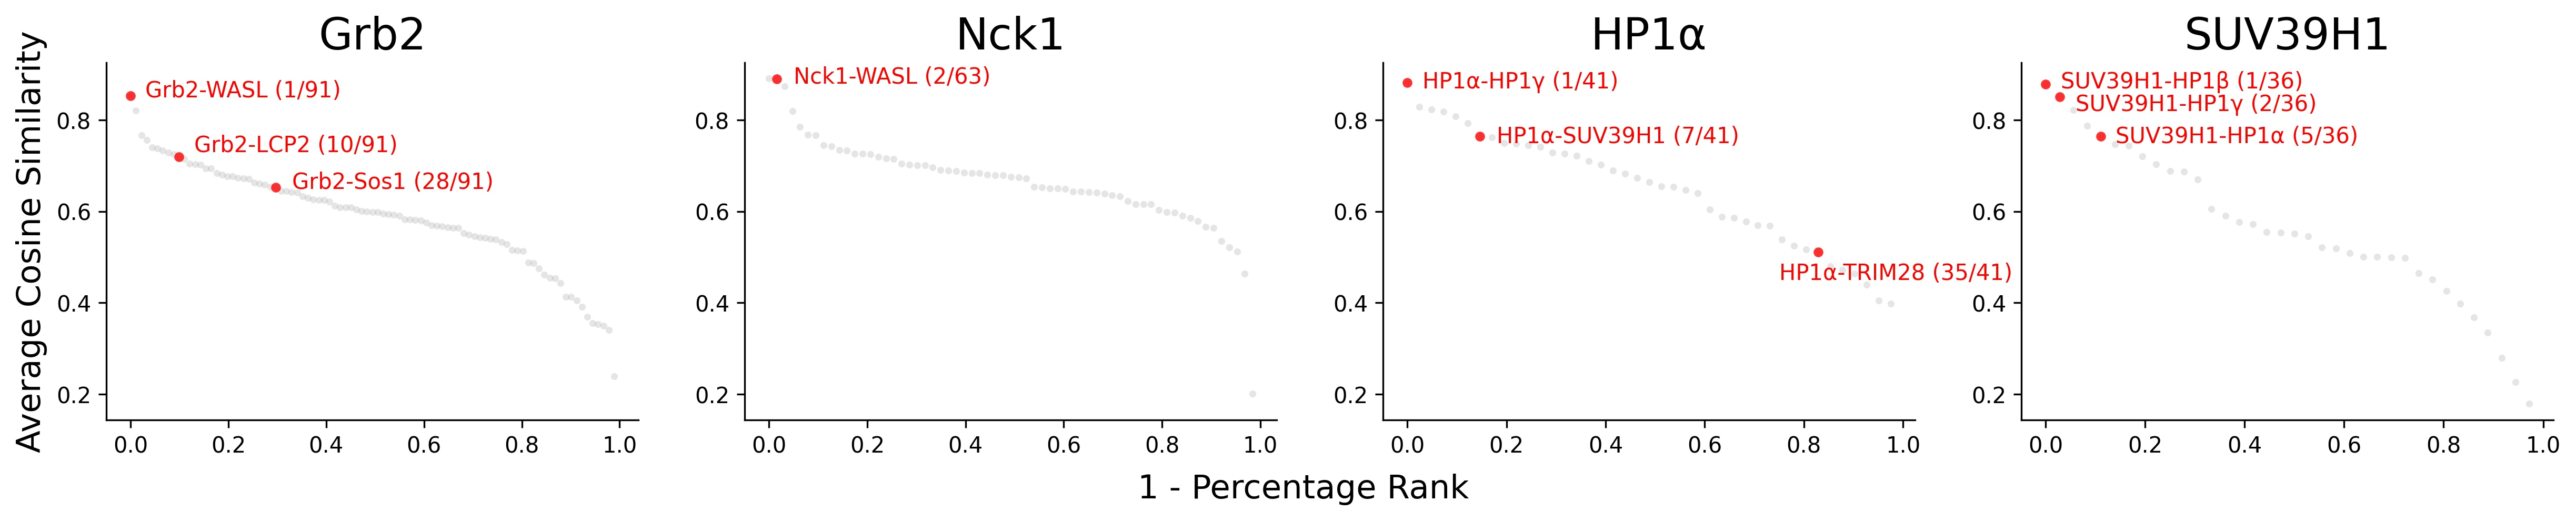

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    figsize = (20, 3),
    sharey = True,
    ncols = 4, nrows = 1
)

FONTSIZE = 10

# Grb2
sns.scatterplot(
    x = 'x',
    y = 'y',
    data = dataset_grb2,
    color = 'grey',
    s = 10,
    linewidth = 0,
    alpha = .2,
    legend = False,
    ax = ax1
)
sns.scatterplot(x='x', y='y', data=dataset_grb2[dataset_grb2['label']==1], color='red', s=20, linewidth=0, alpha=.8, legend=False, ax=ax1)
ax1.set_title('Grb2', size = 20)
# ax1.set_xlabel('1 - Percentage Rank', size = 15)
ax1.set_xlabel(None)
ax1.set_ylabel('Average Cosine Similarity', size = 15)
ax1.set_yticks(np.arange(.2, 1., .2))
ax1.set_yticklabels([round(i, 2) for i in np.arange(.2, 1., .2)])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(.03, .85,'Grb2-WASL (1/91)', c='red', fontsize=FONTSIZE)
ax1.text(.13, .73,'Grb2-LCP2 (10/91)', c='red', fontsize=FONTSIZE)
ax1.text(.33, .65,'Grb2-Sos1 (28/91)', c='red', fontsize=FONTSIZE)

# Nck1
sns.scatterplot(
    x = 'x',
    y = 'y',
    data = dataset_nck1,
    color = 'grey',
    s = 10,
    linewidth = 0,
    alpha = .2,
    legend = False,
    ax = ax2
)
sns.scatterplot(x='x', y='y', data=dataset_nck1[dataset_nck1['label']==1], color='red', s=20, linewidth=0, alpha=.8, legend=False, ax=ax2)
ax2.set_title('Nck1', size = 20)
ax2.set_xlabel('1 - Percentage Rank', size = 15)
ax2.set_ylabel(None)
ax2.set_yticks(np.arange(.2, 1., .2))
ax2.set_yticklabels([round(i, 2) for i in np.arange(.2, 1., .2)])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.xaxis.set_label_coords(1.05, -.15)
ax2.text(.05, .88,'Nck1-WASL (2/63)', c='red', fontsize=FONTSIZE)

# HP1a
sns.scatterplot(
    x = 'x',
    y = 'y',
    data = dataset_hp1a,
    color = 'grey',
    s = 10,
    linewidth = 0,
    alpha = .2,
    legend = False,
    ax = ax3
)
sns.scatterplot(x='x', y='y', data=dataset_hp1a[dataset_hp1a['label']==1], color='red', s=20, linewidth=0, alpha=.8, legend=False, ax=ax3)
ax3.set_title('HP1α', size = 20)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticks(np.arange(.2, 1., .2))
ax3.set_yticklabels([round(i, 2) for i in np.arange(.2, 1., .2)])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.text(.03, .87,'HP1α-HP1γ (1/41)', c='red', fontsize=FONTSIZE)
ax3.text(.18, .75,'HP1α-SUV39H1 (7/41)', c='red', fontsize=FONTSIZE)
ax3.text(.75, .45,'HP1α-TRIM28 (35/41)', c='red', fontsize=FONTSIZE)

# SUV91
sns.scatterplot(
    x = 'x',
    y = 'y',
    data = dataset_suv91,
    color = 'grey',
    s = 10,
    linewidth = 0,
    alpha = .2,
    legend = False,
    ax = ax4
)
sns.scatterplot(x='x', y='y', data=dataset_suv91[dataset_suv91['label']==1], color='red', s=20, linewidth=0, alpha=.8, legend=False, ax=ax4)
ax4.set_title('SUV39H1', size = 20)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_yticks(np.arange(.2, 1., .2))
ax4.set_yticklabels([round(i, 2) for i in np.arange(.2, 1., .2)])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.text(.03, .87,'SUV39H1-HP1β (1/36)', c='red', fontsize=FONTSIZE)
ax4.text(.06, .82,'SUV39H1-HP1γ (2/36)', c='red', fontsize=FONTSIZE)
ax4.text(.14, .75,'SUV39H1-HP1α (5/36)', c='red', fontsize=FONTSIZE)

In [34]:
# dataset_grb2.to_csv('./230531-Grb2_Binding_Partners.csv', index=None)

In [239]:
# G3BP1 Q13283
dataset_g3bp1 = dataset2[dataset2[2].str.contains('Q13283')][[0, 1, 2, 'mean.cos.sim']].reset_index(drop=True)

In [252]:
dataset_g3bp1['pct.rank.G3BP1'] = dataset_g3bp1['mean.cos.sim'].rank(pct=True)
dataset_g3bp1.loc[dataset_g3bp1[2].isin(ppi[2]), 'label'] = 1
dataset_g3bp1['label'] = dataset_g3bp1['label'].fillna(0)

In [253]:
dataset_g3bp1['rank.G3BP1'] = dataset_g3bp1['mean.cos.sim'].rank()
dataset_g3bp1['rank.G3BP1'] = len(dataset_g3bp1) - dataset_g3bp1['rank.G3BP1'] + 1

In [237]:
sg_1 = pd.read_table('./uniprot-download_true_fields_accession_2Cid_format_tsv_query__28revi-2023.05.24-03.54.11.68.tsv')['Entry'].tolist()

In [244]:
sg_1.remove('Q13283')

In [262]:
temp.shape

(33, 8)

In [261]:
temp = dataset_g3bp1[(dataset_g3bp1['label']==1)].sort_values(by='pct.rank.G3BP1', ascending=False).reset_index(drop=True)
temp['rank'] = np.arange(len(temp)) + 1
temp[(temp[0].isin(sg_1))|(temp[1].isin(sg_1))]

,0,1,2,mean.cos.sim,pct.rank.G3BP1,rank.G3BP1,label,rank
2,Q9UN86,Q13283,Q13283Q9UN86,0.875689,0.998431,26.0,1.0,3
9,Q14694,Q13283,Q13283Q14694,0.790648,0.972769,435.0,1.0,10
30,Q7Z417,Q13283,Q13283Q7Z417,0.417243,0.520768,7639.0,1.0,31
